In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Activation
)
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import Sequence
from tensorflow.keras.callbacks import ModelCheckpoint

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
BASE_PATH = "/camvid/CamVid"

train_images = []
for images in os.listdir(BASE_PATH+"/train/"):
    train_images.append(train_images)
num_train_img = (len(train_images))

train_labels = []
for trlabel in os.listdir(BASE_PATH+"/train_labels"):
    train_labels.append(trlabel)

test_images = []
for testimage in os.listdir(BASE_PATH+"/test/"):
    test_images.append(testimage)
num_test_img = (len(test_images))

test_labels = []
for testlabel in os.listdir(BASE_PATH+"/test_labels/"):
    test_labels.append(testlabel)

val_images = []
for val_img in os.listdir(BASE_PATH+"/val/"):
    val_images.append(val_img)
num_val_image = len(val_images)
  
val_labels = []
for val_label in os.listdir(BASE_PATH+"/val_labels/"):
    val_labels.append(val_label)

In [3]:
print(f'Number of train,test & label image: {num_train_img,num_test_img,num_val_image}')

Number of train,test & label image: (369, 232, 100)


In [4]:
data = pd.read_csv(BASE_PATH+"/class_dict.csv")


In [5]:
data.head()

,name,r,g,b
0,Animal,64,128,64
1,Archway,192,0,128
2,Bicyclist,0,128,192
3,Bridge,0,128,64
4,Building,128,0,0


In [6]:
classes = data['name']
print(classes)

0                Animal
1               Archway
2             Bicyclist
3                Bridge
4              Building
5                   Car
6       CartLuggagePram
7                 Child
8           Column_Pole
9                 Fence
10         LaneMkgsDriv
11      LaneMkgsNonDriv
12            Misc_Text
13    MotorcycleScooter
14          OtherMoving
15         ParkingBlock
16           Pedestrian
17                 Road
18         RoadShoulder
19             Sidewalk
20           SignSymbol
21                  Sky
22       SUVPickupTruck
23          TrafficCone
24         TrafficLight
25                Train
26                 Tree
27            Truck_Bus
28               Tunnel
29       VegetationMisc
30                 Void
31                 Wall
Name: name, dtype: object


In [7]:
class_n = len(classes)
print(class_n)

32


In [8]:
classes_dict = {category: [r, g, b] for category, r, g, b in zip(data['name'], data['r'], data['g'], data['b'])}

In [9]:
classes_dict

{'Animal': [64, 128, 64],
 'Archway': [192, 0, 128],
 'Bicyclist': [0, 128, 192],
 'Bridge': [0, 128, 64],
 'Building': [128, 0, 0],
 'Car': [64, 0, 128],
 'CartLuggagePram': [64, 0, 192],
 'Child': [192, 128, 64],
 'Column_Pole': [192, 192, 128],
 'Fence': [64, 64, 128],
 'LaneMkgsDriv': [128, 0, 192],
 'LaneMkgsNonDriv': [192, 0, 64],
 'Misc_Text': [128, 128, 64],
 'MotorcycleScooter': [192, 0, 192],
 'OtherMoving': [128, 64, 64],
 'ParkingBlock': [64, 192, 128],
 'Pedestrian': [64, 64, 0],
 'Road': [128, 64, 128],
 'RoadShoulder': [128, 128, 192],
 'Sidewalk': [0, 0, 192],
 'SignSymbol': [192, 128, 128],
 'Sky': [128, 128, 128],
 'SUVPickupTruck': [64, 128, 192],
 'TrafficCone': [0, 0, 64],
 'TrafficLight': [0, 64, 64],
 'Train': [192, 64, 128],
 'Tree': [128, 128, 0],
 'Truck_Bus': [192, 128, 192],
 'Tunnel': [64, 0, 64],
 'VegetationMisc': [192, 192, 0],
 'Void': [0, 0, 0],
 'Wall': [64, 192, 0]}

In [10]:
print(len(classes_dict.values()))

32


In [11]:
def show_img(img , mask=False):
    fig ,ax = plt.subplots(figsize=(6,6))
    if not mask:
        img = plt.imread(img)
    ax.imshow(img)
    plt.show()
    return img

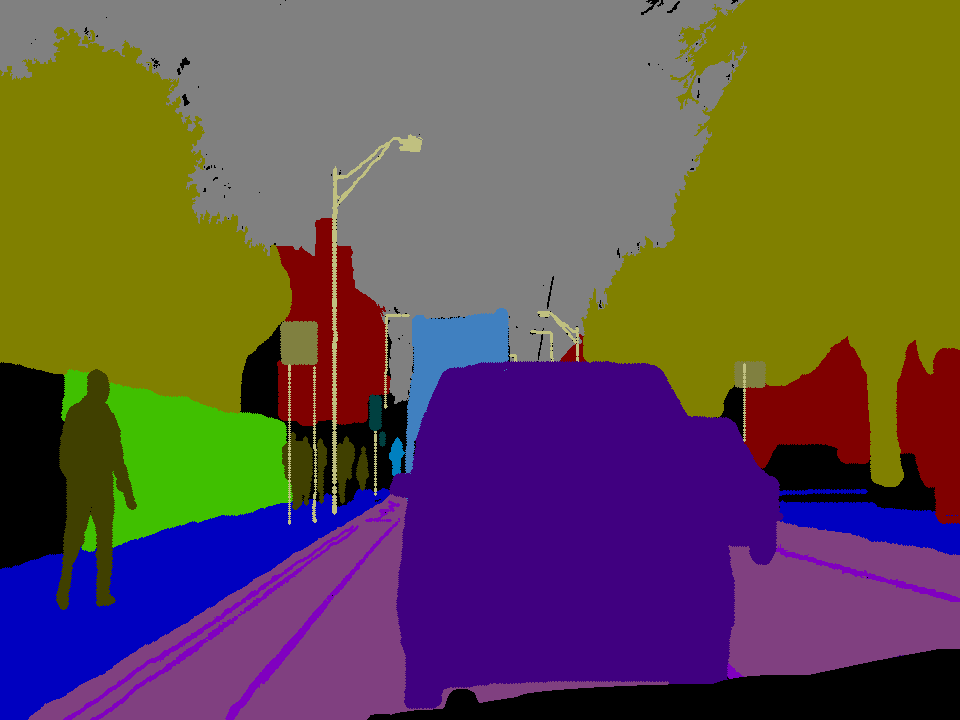

In [12]:
img = load_img('camvid/CamVid/train_labels/0001TP_009210_L.png')
img

In [13]:
img = np.array(img)
print(img.shape)

(720, 960, 3)


In [14]:
colors =[]
for color in list(classes_dict.values()):
    colors.append(color)
print(colors)

[[64, 128, 64], [192, 0, 128], [0, 128, 192], [0, 128, 64], [128, 0, 0], [64, 0, 128], [64, 0, 192], [192, 128, 64], [192, 192, 128], [64, 64, 128], [128, 0, 192], [192, 0, 64], [128, 128, 64], [192, 0, 192], [128, 64, 64], [64, 192, 128], [64, 64, 0], [128, 64, 128], [128, 128, 192], [0, 0, 192], [192, 128, 128], [128, 128, 128], [64, 128, 192], [0, 0, 64], [0, 64, 64], [192, 64, 128], [128, 128, 0], [192, 128, 192], [64, 0, 64], [192, 192, 0], [0, 0, 0], [64, 192, 0]]


In [15]:
class_name = list((classes_dict.keys()))

print(class_name)

['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone', 'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall']


In [16]:
class_id = 30
case_all_class = np.float32(np.equal(colors[class_id ], img)*1)
case_true_class =  np.float32(np.all(np.equal(colors[class_id ], img), axis = -1)*1)


class name: Void


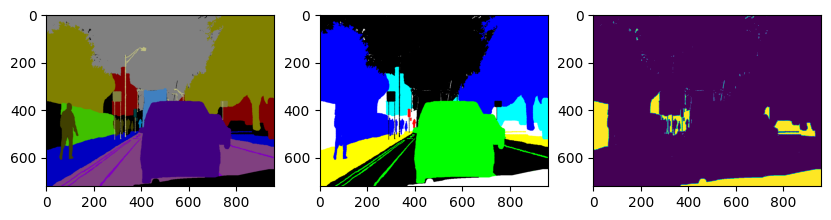

In [17]:
_, axes = plt.subplots(nrows=1, ncols= 3, figsize=(10, 3))

axes[0].imshow(img)
axes[1].imshow(case_all_class )
axes[2].imshow(case_true_class, cmap='gray')

print('class name:', class_name[class_id ])
plt.imshow(case_all_class)
plt.imshow(case_true_class)

In [18]:
def adjust_mask(mask, flat=False):
    
    semantic_map = []
    for color in list(classes_dict.values()):        
        equality = np.equal(mask, color)
        class_map = np.all(equality, axis = -1)
        semantic_map.append(class_map)
    semantic_map = np.stack(semantic_map, axis=-1)
    if flat:
        semantic_map = np.reshape(semantic_map, (-1,256*256))

    return np.float32(semantic_map)

In [19]:
new_mask = adjust_mask(img)
print(new_mask.shape,img.shape)

(720, 960, 32) (720, 960, 3)


In [20]:
idx2rgb = {}
for idx, (cl, rgb) in enumerate(classes_dict.items()):
    idx2rgb[idx] = np.array(rgb)
print(idx2rgb)

{0: array([ 64, 128,  64]), 1: array([192,   0, 128]), 2: array([  0, 128, 192]), 3: array([  0, 128,  64]), 4: array([128,   0,   0]), 5: array([ 64,   0, 128]), 6: array([ 64,   0, 192]), 7: array([192, 128,  64]), 8: array([192, 192, 128]), 9: array([ 64,  64, 128]), 10: array([128,   0, 192]), 11: array([192,   0,  64]), 12: array([128, 128,  64]), 13: array([192,   0, 192]), 14: array([128,  64,  64]), 15: array([ 64, 192, 128]), 16: array([64, 64,  0]), 17: array([128,  64, 128]), 18: array([128, 128, 192]), 19: array([  0,   0, 192]), 20: array([192, 128, 128]), 21: array([128, 128, 128]), 22: array([ 64, 128, 192]), 23: array([ 0,  0, 64]), 24: array([ 0, 64, 64]), 25: array([192,  64, 128]), 26: array([128, 128,   0]), 27: array([192, 128, 192]), 28: array([64,  0, 64]), 29: array([192, 192,   0]), 30: array([0, 0, 0]), 31: array([ 64, 192,   0])}


In [21]:
def map_class_to_rgb(p):
    return idx2rgb[p[0]]

In [22]:
rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(np.argmax(new_mask, axis=-1), -1))

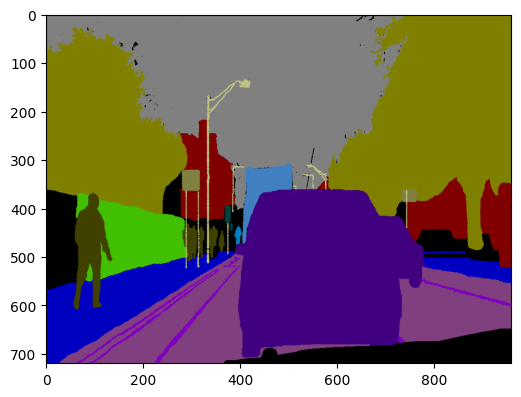

array([[[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128,   0],
        [128, 128,   0],
        [128, 128,   0]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128,   0],
        [128, 128,   0],
        [128, 128,   0]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128,   0],
        [128, 128,   0],
        [128, 128,   0]],

       ...,

       [[  0,   0, 192],
        [  0,   0, 192],
        [  0,   0, 192],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0, 192],
        [  0,   0, 192],
        [  0,   0, 192],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0, 192],
        [  0,   0, 192],
        [  0,   0, 192],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [23]:
show_img(rgb_mask,mask=True)

In [24]:
 

def dice(y_true, y_pred, smooth=1):
    
    intersection = K.sum(y_true * y_pred, axis=[-1])
    union = K.sum(y_true, axis=[-1]) + K.sum(y_pred, axis=[-1])
    dicef = K.mean((2. * intersection + smooth)/(union + smooth), axis=-1)
    return dicef


def IOU(y_true, y_pred, smooth=1):

    intersection = K.sum(y_true * y_pred, axis=[-1])
    union = K.sum(y_true, axis=[-1]) + K.sum(y_pred, axis=[-1])-intersection
    iou_scr = K.mean(( intersection + smooth)/(union + smooth), axis=-1)
    return iou_scr

In [25]:
def unet(n_classes=32, pretrained_weights=None, input_size=(256, 256, 3), flat=False, ohe=True):
    inputs = Input(input_size)
    
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    
    up4 = UpSampling2D(size=(2, 2))(conv3)
    up4 = Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(up4)
    merge4 = concatenate([conv2, up4], axis=3)
    
    conv4 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge4)
    conv4 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    
    up5 = UpSampling2D(size=(2, 2))(conv4)
    up5 = Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(up5)
    merge5 = concatenate([conv1, up5], axis=3)
    
    conv5 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge5)
    conv5 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    
    # Fewer Additional Layers (Removed some of the added layers)
    conv6 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)
    
    conv8 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)
    
    conv9 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)
    
    conv10 = Conv2D(n_classes, (1, 1), padding='same')(conv9)
    
    if flat:
        output_layer = Reshape((256 * 256, n_classes))(conv10)
    else:
        output_layer = conv10
    
    output_layer = Activation('softmax')(output_layer)
    
    model = Model(inputs=inputs, outputs=output_layer)
    Adam = tf.keras.optimizers.Adam
    if ohe:
        model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy', dice])
    else:
        model.compile(optimizer=Adam(lr=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    if pretrained_weights:
        model.load_weights(pretrained_weights)

    return model



In [26]:
model = unet()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [27]:
view = 0
batch_sz = 8
epochs = 50
 
validation_steps = 32

In [28]:
data_gen_args = dict(rescale=1./255)

mask_gen_args = dict()

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen  = ImageDataGenerator(**mask_gen_args) 
seed = 1
# Train generate
image_generator = image_datagen.flow_from_directory(
    BASE_PATH,
    class_mode=None,
    classes=['train'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))
mask_generator = mask_datagen.flow_from_directory(
    BASE_PATH,
    classes=['train_labels'],
    class_mode=None,
    seed=seed,
    color_mode='rgb',
    batch_size=batch_sz,
    target_size=(256,256))

train_generator = zip(image_generator, mask_generator)

#test generator

test_image_generator = image_datagen.flow_from_directory(
    BASE_PATH,
    class_mode=None,
    classes=['test'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))

test_mask_generator = mask_datagen.flow_from_directory(
    BASE_PATH,
    classes=['test_labels'],
    class_mode=None,
    seed=seed,
    batch_size=batch_sz,
    color_mode='rgb',
    target_size=(256,256))
test_generator = zip(test_image_generator, test_mask_generator)

#validation generat
val_image_generator = image_datagen.flow_from_directory(
    BASE_PATH,
    class_mode=None,
    classes=['val'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))

val_mask_generator = mask_datagen.flow_from_directory(
    BASE_PATH,
    classes=['val_labels'],
    class_mode=None,
    seed=seed,
    batch_size=batch_sz,
    color_mode='rgb',
    target_size=(256,256))
val_generator = zip(val_image_generator, val_mask_generator)

Found 369 images belonging to 1 classes.
Found 369 images belonging to 1 classes.
Found 232 images belonging to 1 classes.
Found 232 images belonging to 1 classes.
Found 100 images belonging to 1 classes.
Found 100 images belonging to 1 classes.


In [29]:
def train_generator_fn():
    for (img,mask) in train_generator:
    
        
        new_mask = adjust_mask(mask)
        yield (img,new_mask)    

In [30]:
def val_generator_fn():
    for (img,mask) in val_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)  

In [31]:
model_checkpoint = ModelCheckpoint('unet_model.hdf5', monitor='val_loss', verbose=1, save_best_only=True)


history = model.fit(train_generator_fn(),
                    validation_data=val_generator_fn(),
                    steps_per_epoch=num_train_img // batch_sz,
                    validation_steps=validation_steps,
                    epochs=epochs,
                    callbacks=[model_checkpoint])
print(history.history)

Epoch 1/50
46/46 [==============================] - ETA: 0s - loss: 2.1898 - accuracy: 0.3869 - dice: 0.4893
Epoch 1: val_loss improved from inf to 1.54149, saving model to unet_model.hdf5
46/46 [==============================] - 224s 3s/step - loss: 2.1898 - accuracy: 0.3869 - dice: 0.4893 - val_loss: 1.5415 - val_accuracy: 0.5772 - val_dice: 0.6299
Epoch 2/50
46/46 [==============================] - ETA: 0s - loss: 1.4141 - accuracy: 0.5920 - dice: 0.6286
Epoch 2: val_loss improved from 1.54149 to 1.28974, saving model to unet_model.hdf5
46/46 [==============================] - 118s 2s/step - loss: 1.4141 - accuracy: 0.5920 - dice: 0.6286 - val_loss: 1.2897 - val_accuracy: 0.6275 - val_dice: 0.6736
Epoch 3/50
46/46 [==============================] - ETA: 0s - loss: 1.2935 - accuracy: 0.6165 - dice: 0.6517
Epoch 3: val_loss improved from 1.28974 to 1.24872, saving model to unet_model.hdf5
46/46 [==============================] - 111s 2s/step - loss: 1.2935 - accuracy: 0.6165 - dice: 0

In [32]:
def visualize_seg(img, gt_mask, shape='normal', gt_mode='sparse'):
  fig , ax = plt.subplots(1,3,figsize=(10,10))
  

  ax[0].imshow(img)
  ax[0].set_title("Orignal Image")
  
  # Predict
  pred_mask = model.predict(np.expand_dims(img, 0))
  pred_mask = np.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[0]
  if shape=='flat':
    pred_mask = np.reshape(pred_mask, (256,256)) # Reshape only if you use the flat model. O.w. you dont need
  
  rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(pred_mask, -1))
  
  # Prediction
  ax[1].imshow(rgb_mask)
  ax[1].set_title("Predicted Mask")

              
  # GT mask
  if gt_mode == 'ohe':
    gt_img_ohe = np.argmax(gt_mask, axis=-1)
    gt_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(gt_img_ohe, -1))              
  
  ax[2].imshow((gt_mask).astype(np.uint8))
  ax[2].set_title("Ground truth")

1/1 [==============================] - 0s 186ms/step


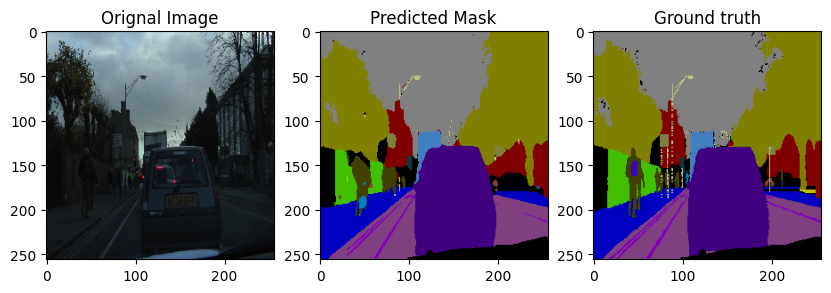

In [33]:
img = next(val_image_generator)[0]
gt_img = next(val_mask_generator)[0]
visualize_seg(img, gt_img, gt_mode='sparse')

In [34]:
def compute_metrics(y_true, y_pred):
  
  class_wise_iou = []
  class_wise_dice_score = []

  smoothening_factor = 0.00001

  for i in range(32):
    intersection = np.sum((y_pred == i) * (y_true == i))
    y_true_area = np.sum((y_true == i))
    y_pred_area = np.sum((y_pred == i))
    combined_area = y_true_area + y_pred_area
    
    iou = (intersection + smoothening_factor) / (combined_area - intersection + smoothening_factor)
    class_wise_iou.append(iou)
    
    dice_score =  2 * ((intersection + smoothening_factor) / (combined_area + smoothening_factor))
    class_wise_dice_score.append(dice_score)

    return class_wise_iou, class_wise_dice_score

In [35]:
p_img = model.predict(np.expand_dims(img, 0))[0]
pred_mask = np.argmax(p_img, axis=-1)
rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(pred_mask, -1))



im_iou, im_dice = compute_metrics(np.uint8(gt_img),np.uint8(rgb_mask))

print('iou score, dice score',im_iou, im_dice  )

1/1 [==============================] - 0s 21ms/step
iou score, dice score [0.9062820533199284] [0.9508373137297222]
